# 참고 링크
https://docs.ultralytics.com/ko/yolov5/tutorials/train_custom_data/#4-train

https://docs.ultralytics.com/ko/quickstart/#understanding-settings

https://www.youtube.com/watch?v=Ped-JdFEYdk&t=861s


---



---



드라이브에서 파일 가져오기

> 본래 단계에서는 생략

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -qq '/content/drive/MyDrive/dataset.zip' -d '/content/'

---

---



데이터 전처리

> 기존 JSON 파일에서 TXT 파일로 변환하는 과정

In [ ]:
import os
import json

path = "/content/labels/" #json2txt.ipynb 파일과 동일한 경로에 있기 때문에 다음과 같이 선언

file_lists = os.listdir(path) #path 경로 내 모든 파일명 리스트 형태로 불러오기
print(file_lists)

['NegativeDB_구름_강원도강릉시난곡동_NP020001_001_없음_00003960.json', 'NegativeDB_구름_강원도강릉시난곡동_NP020001_001_없음_00002640.json', 'NegativeDB_구름_강원도강릉시난곡동_NP020001_001_없음_00002580.json', 'NegativeDB_구름_강원도강릉시난곡동_NP020001_001_없음_00008580.json', 'NegativeDB_구름_강원도강릉시난곡동_NP020001_001_없음_00006120.json', 'NegativeDB_구름_강원도강릉시난곡동_NP020001_001_없음_00002280.json', 'NegativeDB_구름_강원도강릉시난곡동_NP020001_001_없음_00002340.json', 'NegativeDB_구름_강원도강릉시난곡동_NP020001_001_없음_00003000.json', 'NegativeDB_구름_강원도강릉시난곡동_NP020001_001_없음_00004680.json', 'NegativeDB_구름_강원도강릉시난곡동_NP020001_001_없음_00002040.json', 'NegativeDB_구름_강원도강릉시난곡동_NP020001_001_없음_00002880.json', 'NegativeDB_구름_강원도강릉시난곡동_NP020001_001_없음_00008640.json', 'NegativeDB_구름_강원도강릉시난곡동_NP020001_001_없음_00004560.json', 'NegativeDB_구름_강원도강릉시난곡동_NP020001_001_없음_00004740.json', 'NegativeDB_구름_강원도강릉시난곡동_NP020001_001_없음_00000660.json', 'NegativeDB_구름_강원도강릉시난곡동_NP020001_001_없음_00006900.json', 'NegativeDB_구름_강원도강릉시난곡동_NP020001_001_없음_00007200.json', 'NegativeDB_구름_강원도강릉시난곡동_NP020

In [ ]:
#.json 확장자만 저장하기
json_file_lists = []
for file_name in sorted(file_lists):
    if file_name.split(".")[-1] == "json":
        json_file_lists.append(file_name)

In [ ]:
for j, json_file in enumerate(json_file_lists):
  #print(j,  json_file) #00000005.json 한개에 대해서 json2txt 변환하기 위해 해당 인덱스에 00000005.json 파일 불러오기
  with open(os.path.join(path, json_file),"r") as file:
      json_data = json.load(file) #json 파일 내 데이터 읽어오기

  WIDTH = float(json_data['images'][0]['width'])
  HEIGHT = float(json_data['images'][0]['height'])

  new_file = open(os.path.join(path, json_data['images'][0]['file_name'].split(".")[0]+'.txt'),"w") #"w": 쓰기 형식, "r": 읽기 형식, "a": 이어쓰기 형식
  #print(os.path.join(path, json_data['images'][0]['file_name'].split(".")[0]+'.txt'))
  #CLASS_NAMES = ['흑색연기', '백색/회색연기', '화염', '구름', '안개/연무', '굴뚝연기'] # 파일 내 커스텀 클래스 정보

  #json 데이터 내 'shapes' 정보 읽어오기
  for i, data in enumerate(json_data['annotations']):
      #print("   ", i) #순차적으로 for문이 진행되는지 확인하는 인덱스 번호 출력
      class_id = data['category_id']
      if class_id<0 or class_id>6:
        print(class_id)
      x_left_top = float(data['bbox'][0]) #물체의 바운딩 박스, left top x좌표
      y_left_top = float(data['bbox'][1]) #물체의 바운딩 박스, left top y좌표
      x_right_bottom = float(data['bbox'][2]) #물체의 바운딩 박스, right bottom x좌표
      y_right_bottom = float(data['bbox'][3]) #물체의 바운딩 박스, right bottom y좌표
      width = x_right_bottom - x_left_top #물체의 바운딩 박스 너비
      height = y_right_bottom - y_left_top #물체의 바운딩 박스 높이
      normalize_width = abs(width) / WIDTH #YOLO 학습을 위해 너비 정규화
      normalize_height = abs(height) / HEIGHT #YOLO 학습을 위해 높이 정규화
      ctr_x = x_left_top + width / 2 #물체 바운딩 박스 중심 x 좌표
      normalize_ctr_x = ctr_x / WIDTH #YOLO 학습을 위해 물체 바운딩 박스 중심 x 좌표 정규화
      ctr_y = y_left_top + height / 2 #물체 바운딩 박스 중심 y 좌표
      normalize_ctr_y = ctr_y / HEIGHT #YOLO 학습을 위해 물체 바운딩 박스 중심 y 좌표 정규화
      #텍스트 파일에 YOLO 학습용 데이터 포맷으로 정리
      #모든 값은 string 타입으로 저장해야함
      new_data = "{} {} {} {} {}\n".format(str(class_id), str(normalize_ctr_x), str(normalize_ctr_y), str(normalize_width), str(normalize_height))

      new_file.write(new_data)

  new_file.close()

*아래는 바운더리 박스 테스트용임*

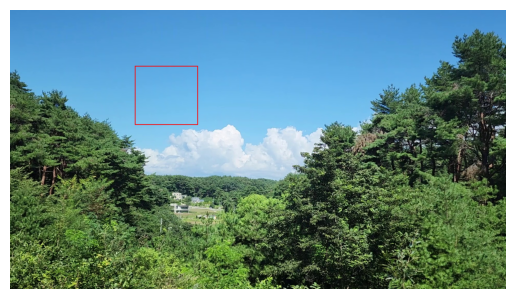

In [ ]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

def draw_bounding_box(image_path, x1, y1, x2, y2, color="red"):
    # 이미지 로드
    image = Image.open(image_path)


    # 그리기 객체 생성
    draw = ImageDraw.Draw(image)

    # 바운딩 박스 그리기
    draw.rectangle([x1, y1, x2, y2], outline=color, width=3)

    # 이미지 출력
    plt.imshow(image)
    plt.axis("off")  # 축 없애기
    plt.show()

# 사용 예시
#draw_bounding_box("test_image.jpg", 37, 29, 1322, 443)
draw_bounding_box("test_image.jpg", 483, 216, 727, 444)

In [ ]:
# jpg 파일과 txt 파일 목록 가져오기
jpg_files = [f for f in os.listdir('/content/images/') if f.lower().endswith(".jpg")]
txt_files = [f for f in os.listdir('/content/labels/') if f.lower().endswith(".txt")]
print(len(jpg_files))
print(len(txt_files))

# 파일 이름 비교 및 동일하지 않은 파일 삭제
for txt_file in txt_files:
    jpg_file = txt_file.replace(".txt", ".jpg")
    if jpg_file not in jpg_files:
        os.remove(os.path.join('/content/labels/', txt_file))
        print(f"Deleted {jpg_file}")

print("File comparison and removal completed.")

143
143
File comparison and removal completed.


*본 학습 진행 시, test셋은 외부 데이터 사용*

In [ ]:
from glob import glob

img_list = glob('/content/images/*.jpg')
label_list = glob('/content/labels/*.txt')
print(len(img_list),len(label_list))

143 143


In [ ]:
from sklearn.model_selection import train_test_split

train_img_list, val_img_list = train_test_split(img_list, test_size=0.3, random_state=2000)
val_img_list, test_img_list = train_test_split(val_img_list, test_size=0.33, random_state=2000)

print(len(train_img_list), len(val_img_list), len(test_img_list))

100 28 15


In [ ]:
with open('/content/train.txt', 'w') as f:
  f.write('\n'.join(train_img_list) + '\n')

with open('/content/val.txt', 'w') as f:
  f.write('\n'.join(val_img_list) + '\n')

with open('/content/test.txt', 'w') as f:
  f.write('\n'.join(test_img_list) + '\n')

In [ ]:
import yaml

with open('/content/data.yaml', 'r') as f:
  data = yaml.safe_load(f)

print(data)
print(len(data['names']))

{'train': 'train.txt', 'val': 'val.txt', 'test': 'test.txt', 'nc': 6, 'names': ['black', 'white', 'fire', 'cloud', 'fog', 'chimney']}
6


---

---



YOLO11


> 모델 학습 및 예측



In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 976.9/976.9 kB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.5/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

# Load a COCO-pretrained YOLO11n model
model = YOLO("yolo11n.pt")

# Train the model on the COCO8 example dataset for 100 epochs
results = model.train(data='/content/data.yaml', epochs=10, patience=10, batch=32,imgsz=640)

# Run inference with the YOLO11n model on the 'bus.jpg' image
#results = model("path/to/bus.jpg")

100%|██████████| 5.35M/5.35M [00:00<00:00, 103MB/s]


Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/data.yaml, epochs=10, time=None, patience=10, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, li

100%|██████████| 755k/755k [00:00<00:00, 22.8MB/s]


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/labels... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<00:00, 705.95it/s]

train: New cache created: /content/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/labels... 28 images, 0 backgrounds, 0 corrupt: 100%|██████████| 28/28 [00:00<00:00, 506.69it/s]

val: New cache created: /content/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      4.43G      4.368      7.299      3.521          9        640: 100%|██████████| 4/4 [00:07<00:00,  1.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.17s/it]

                   all         28         64          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.43G      4.305      6.886      3.436          8        640: 100%|██████████| 4/4 [00:01<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]

                   all         28         64          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      4.46G      3.706      6.075      2.967         10        640: 100%|██████████| 4/4 [00:01<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all         28         64          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.48G      2.922      5.156      2.488         10        640: 100%|██████████| 4/4 [00:01<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]

                   all         28         64       0.25     0.0625      0.136     0.0265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      4.48G      2.459      4.668      2.038          9        640: 100%|██████████| 4/4 [00:01<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]

                   all         28         64      0.138      0.406      0.273     0.0659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.48G      2.391      4.555      2.072          7        640: 100%|██████████| 4/4 [00:01<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         28         64     0.0457      0.391      0.109     0.0373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.48G      2.128      4.228      1.966          8        640: 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         28         64     0.0383      0.453      0.213     0.0711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      4.48G      1.999      3.877      1.845         13        640: 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]

                   all         28         64     0.0352      0.453       0.29     0.0895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.48G      1.962      3.759      1.814         10        640: 100%|██████████| 4/4 [00:01<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all         28         64     0.0384        0.5      0.374     0.0995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      4.48G      1.905      3.549       1.74         10        640: 100%|██████████| 4/4 [00:01<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]

                   all         28         64     0.0399      0.484      0.346      0.105



10 epochs completed in 0.011 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.4MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.4MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,322 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


                   all         28         64     0.0404      0.484      0.348      0.106
                   fog         28         64     0.0404      0.484      0.348      0.106
Speed: 0.1ms preprocess, 1.8ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train


In [ ]:
results = model.predict(source='/content/images/',save=True)


image 1/143 /content/images/NegativeDB_구름_강원도강릉시난곡동_NP020001_001_없음_00000060.jpg: 384x640 (no detections), 49.2ms
image 2/143 /content/images/NegativeDB_구름_강원도강릉시난곡동_NP020001_001_없음_00000120.jpg: 384x640 (no detections), 13.1ms
image 3/143 /content/images/NegativeDB_구름_강원도강릉시난곡동_NP020001_001_없음_00000180.jpg: 384x640 (no detections), 10.0ms
image 4/143 /content/images/NegativeDB_구름_강원도강릉시난곡동_NP020001_001_없음_00000240.jpg: 384x640 (no detections), 10.1ms
image 5/143 /content/images/NegativeDB_구름_강원도강릉시난곡동_NP020001_001_없음_00000300.jpg: 384x640 (no detections), 10.4ms
image 6/143 /content/images/NegativeDB_구름_강원도강릉시난곡동_NP020001_001_없음_00000360.jpg: 384x640 (no detections), 10.5ms
image 7/143 /content/images/NegativeDB_구름_강원도강릉시난곡동_NP020001_001_없음_00000420.jpg: 384x640 (no detections), 55.3ms
image 8/143 /content/images/NegativeDB_구름_강원도강릉시난곡동_NP020001_001_없음_00000480.jpg: 384x640 (no detections), 16.0ms
image 9/143 /content/images/NegativeDB_구름_강원도강릉시난곡동_NP020001_001_없음_00000540.jpg: 384x6